# Project - Rcommendation Engine

## Import packages

In [2]:
import numpy as np
import pandas as pd

In [7]:
# Read movies dataset 
movies = pd.read_csv("./data/movies.csv")

# check shape of the dataset
movies.shape

(9742, 3)

In [8]:
# Check the dataframe movies 
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
# Read dataset user_ratings
user_ratings_df = pd.read_csv("./data/user_ratings.csv")

# check shape of the user_ratings
user_ratings_df.shape

(100836, 6)

In [18]:
# check DataFrame user_ratings
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [22]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

# Inspect the most common values
print(movie_popularity.head().index)

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)'],
      dtype='object')


In [23]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by="rating", ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


###### The highest-ranked movies are not movies that most people have heard of. This is because very infrequently-viewed movies are skewing the results.

###### Until now we have used the two most common non-personalized recommendation methods to find movies to suggest. As we may have noticed, 
they both have their weaknesses. Finding the most frequently watched movies will show us what has been watched, but not how people explicitly feel 
about it. However, finding the average of reviews has the opposite problem where we have customers' explicit feedback, but individual preferences 
are skewing the data.

### Combining popularity and reviews

In [27]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index
popular_movies

Index(['Forrest Gump (1994)', 'Shawshank Redemption, The (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Braveheart (1995)',
       'Terminator 2: Judgment Day (1991)', 'Schindler's List (1993)',
       ...
       'Mystic River (2003)', 'Knocked Up (2007)', 'Grumpier Old Men (1995)',
       'Blow (2001)', 'Mulholland Drive (2001)', 'Army of Darkness (1993)',
       'Bad Boys (1995)', 'Training Day (2001)', 'The Devil's Advocate (1997)',
       'Splash (1984)'],
      dtype='object', length=437)

In [28]:
# Use the popular_movies list to filter the original DataFrame
popular_movies_rankings = user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Inspect the movies watched over 50 times
print(popular_movies_rankings)

       userId  movieId  rating   timestamp                 title  \
0           1        1     4.0   964982703      Toy Story (1995)   
1           5        1     4.0   847434962      Toy Story (1995)   
2           7        1     4.5  1106635946      Toy Story (1995)   
3          15        1     2.5  1510577970      Toy Story (1995)   
4          17        1     4.5  1305696483      Toy Story (1995)   
...       ...      ...     ...         ...                   ...   
79246     603     1997     4.0   953925513  Exorcist, The (1973)   
79247     606     1997     3.0  1178911117  Exorcist, The (1973)   
79248     607     1997     5.0   963079420  Exorcist, The (1973)   
79249     608     1997     4.5  1117502891  Exorcist, The (1973)   
79250     610     1997     4.0  1479543021  Exorcist, The (1973)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1      Adventure|Animation|Children|Comedy|Fantasy  
2      Adventure|Animati

In [29]:
# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


###### We are now able to make intelligent non-personalized recommendations that combine both the ratings of an item and how frequently it has been interacted with which is powwrful.

In [30]:
user_ratings_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [31]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)), columns=['movie_a', 'movie_b'])
  return pairs

In [33]:

# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

                   movie_a                           movie_b
0         Toy Story (1995)           Grumpier Old Men (1995)
1         Toy Story (1995)                       Heat (1995)
2         Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
3         Toy Story (1995)        Usual Suspects, The (1995)
4         Toy Story (1995)        From Dusk Till Dawn (1996)
...                    ...                               ...
60793295         31 (2016)                 Gen-X Cops (1999)
60793296         31 (2016)                  Bloodmoon (1997)
60793297         31 (2016)  Sympathy for the Underdog (1971)
60793298         31 (2016)                     Hazard (2005)
60793299         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


###### Now we have a clean table of all of the movies that were watched by the same user, which can be used to find the most commonly paired movies.

In [46]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()
print(combination_counts_df.head(10))

      movie_a                                            movie_b  size
0  '71 (2014)                        (500) Days of Summer (2009)     1
1  '71 (2014)                         10 Cloverfield Lane (2016)     1
2  '71 (2014)                                   127 Hours (2010)     1
3  '71 (2014)         13 Assassins (Jûsan-nin no shikaku) (2010)     1
4  '71 (2014)                                    13 Hours (2016)     1
5  '71 (2014)                                     13 Sins (2014)     1
6  '71 (2014)                                        1408 (2007)     1
7  '71 (2014)                                   16 Blocks (2006)     1
8  '71 (2014)  2 Fast 2 Furious (Fast and the Furious 2, The)...     1
9  '71 (2014)                                2001 Maniacs (2005)     1


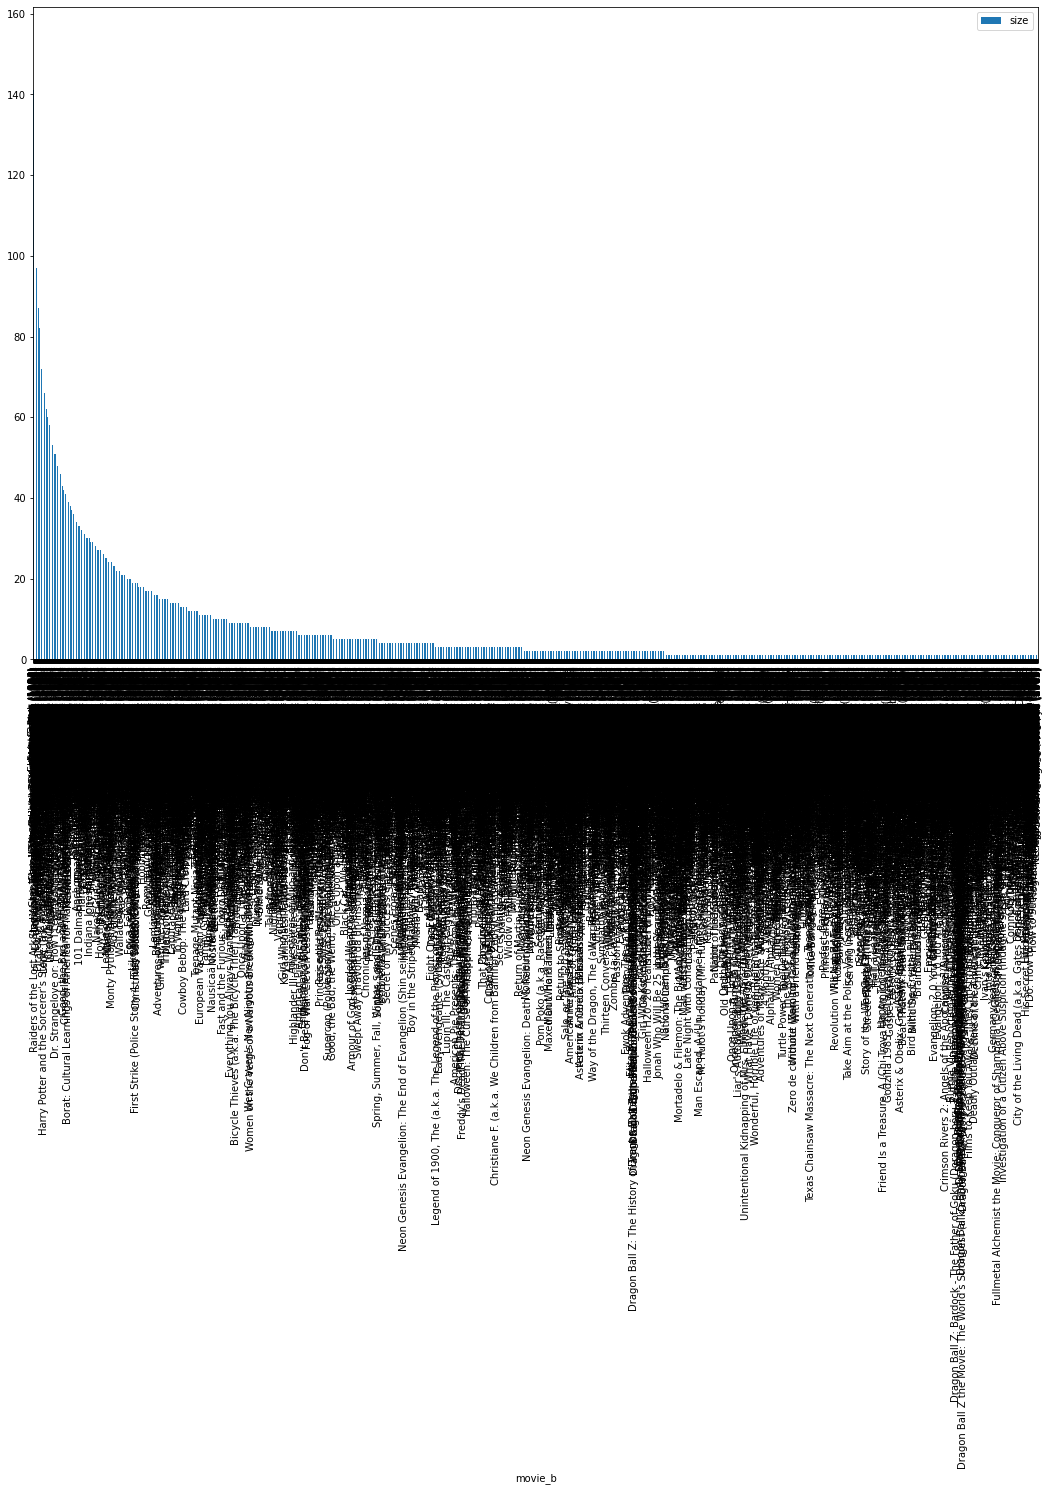

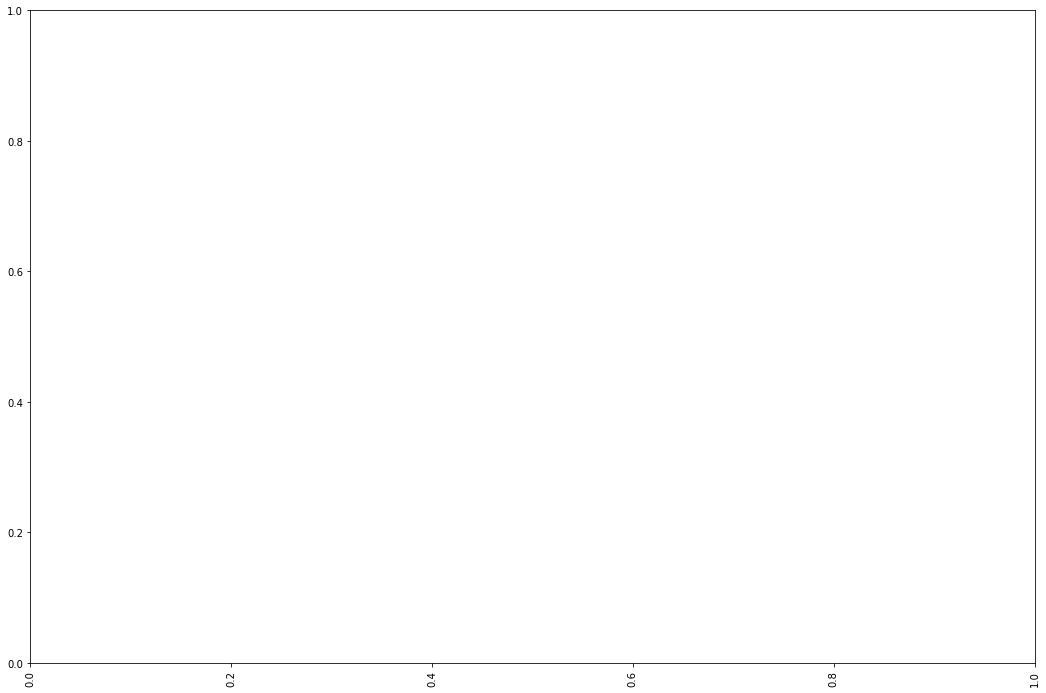

In [45]:
import matplotlib.pyplot as plt

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the movies most frequently watched by people who watched Toy Story (1995)
toy_story_df = combination_counts_df[combination_counts_df['movie_a'] == 'Toy Story (1995)']

# Plot the results
toy_story_df.plot.bar(x="movie_b", figsize=(18,12))
plt.xticks(rotation=90)
plt.show()

###### We can see that 21 Jump Street was the most commonly watched movie by those who watched Thor. 
This means that it would be a good movie to recommend Thor watchers as it shows they have similar fans.